In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("Salary_data.csv")
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
reg = linear_model.LinearRegression()
reg.fit(df[['YearsExperience']],df.Salary)

LinearRegression()

Predicting salary for 2 years experience 

In [4]:
reg.predict([[2]])

array([46323.40828866])

In [5]:
m = reg.coef_
b = reg.intercept_
k = m*2+b
print("for 2022 : ", m ,"*2 + " ,b ," = ",k )

for 2022 :  [8731.94104706] *2 +  28859.52619453144  =  [46323.40828866]


Graphical Repersentation

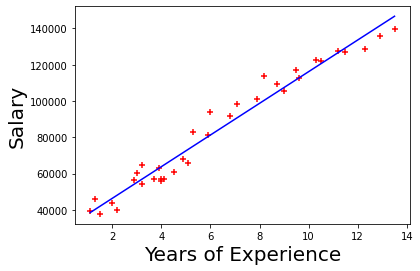

In [6]:
%matplotlib inline
plt.xlabel("Years of Experience", fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.scatter(df.YearsExperience,df.Salary, color="red",marker='+')
plt.plot(df.YearsExperience,reg.predict(df[['YearsExperience']]),color='blue')

Mean Squared Error (Training): 30888963.781003952
Mean Squared Error (Testing): 55761791.306260146
Cross-Validation Mean Squared Error: 56307306.31112118


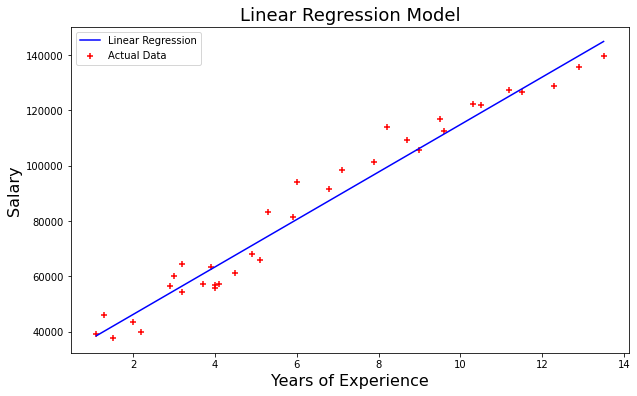

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']], df['Salary'], test_size=0.2, random_state=42)

# Step 2: Train the Linear Regression Model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Step 3: Evaluate Model Performance on Training Set
y_train_pred = reg.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (Training): {mse_train}")

# Step 4: Evaluate Model Performance on Test Set
y_test_pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Testing): {mse_test}")

# Step 5: Cross-Validation
cv_scores = cross_val_score(reg, df[['YearsExperience']], df['Salary'], cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()
print(f"Cross-Validation Mean Squared Error: {mse_cv}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df.YearsExperience, df.Salary, color="red", marker='+', label='Actual Data')
plt.plot(df.YearsExperience, reg.predict(df[['YearsExperience']]), color='blue', label='Linear Regression')
plt.xlabel("Years of Experience", fontsize=16)
plt.ylabel('Salary', fontsize=16)
plt.title('Linear Regression Model', fontsize=18)
plt.legend()
plt.show()
